# Inferential Statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### 1. Chi-square

In [3]:
sandwich = pd.read_csv("Sandwich.csv")
print(sandwich.head())

        Bread       Filling
0   WhiteRice  PeanutButter
1  MultiGrain  SmokedSalmon
2  MultiGrain    VegeOlives
3   WhiteRice  SmokedSalmon
4   WhiteRice    VegeOlives


In [4]:
## Goodness-of-fit
one_freq = pd.crosstab(index=sandwich["Bread"], columns="Counts")
print(one_freq)

col_0       Counts
Bread             
MultiGrain      50
WhiteRice       42
WholeWheat      28


In [5]:
## H0: Following the given distribution
print(stats.chisquare(f_obs=one_freq,
                      f_exp=pd.DataFrame([len(sandwich)/len(one_freq)]*len(one_freq))))

Power_divergenceResult(statistic=array([ 6.2]), pvalue=array([ 0.0450492]))


In [6]:
## Independence or Homogeneity
two_freq = pd.crosstab(index=sandwich["Bread"], columns=sandwich["Filling"], margins=False)
print(two_freq)

Filling     PeanutButter  SmokedSalmon  VegeOlives
Bread                                             
MultiGrain            10            16          24
WhiteRice             16            12          14
WholeWheat             8            11           9


In [7]:
## H0: Independent features or equal feature proportions among groups
print(list(zip(["Statistic", "P-value"],
               stats.chi2_contingency(two_freq, correction=False)[0:2])))

[('Statistic', 4.9523332737350261), ('P-value', 0.29222346118659787)]


### 2. Student's T

In [8]:
iris = pd.read_csv("Iris.csv")
print(iris.head())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width Species
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [9]:
setosa = iris[iris["Species"]=="Setosa"]
versicolour = iris[iris["Species"]=="Versicolour"]
virginica = iris[iris["Species"]=="Virginica"]

In [10]:
## 1-Sample
print(stats.ttest_1samp(a=setosa["Petal_Length"],
                        popmean=round(setosa["Petal_Length"].mean(), 0)))

Ttest_1sampResult(statistic=18.909305173004462, pvalue=3.694510829751633e-24)


In [11]:
## 2-Sample
print(stats.ttest_ind(a=setosa["Petal_Length"], b=versicolour["Petal_Length"], equal_var=False))

Ttest_indResult(statistic=-39.468662593972709, pvalue=1.057210030060334e-45)


In [12]:
## Pairwise
before = stats.norm.rvs(loc=100, scale=30, size=30)
after = before + stats.norm.rvs(loc=10, scale=10, size=30)
print(stats.ttest_rel(a=before, b=after))

Ttest_relResult(statistic=-6.7898609657008402, pvalue=1.8721444894111092e-07)


### 3. ANOVA

In [13]:
print(stats.f_oneway(setosa["Petal_Length"],
                     versicolour["Petal_Length"],
                     virginica["Petal_Length"]))

F_onewayResult(statistic=1179.0343277002194, pvalue=3.0519758018278374e-91)


In [14]:
tukey = pairwise_tukeyhsd(endog=iris["Petal_Length"], groups=iris["Species"], alpha=0.05)
print(tukey.summary())

  Multiple Comparison of Means - Tukey HSD,FWER=0.05 
   group1      group2   meandiff lower  upper  reject
-----------------------------------------------------
   Setosa   Versicolour  2.796   2.5922 2.9998  True 
   Setosa    Virginica   4.088   3.8842 4.2918  True 
Versicolour  Virginica   1.292   1.0882 1.4958  True 
-----------------------------------------------------


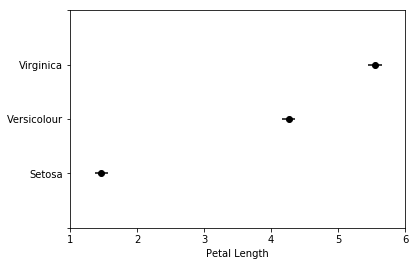

In [15]:
tukey.plot_simultaneous(figsize=(6, 4))
plt.xlim(1, 6); plt.xlabel("Petal Length"); plt.title(""); plt.show()

### 4. Correlation

In [16]:
print(stats.pearsonr(x=setosa["Petal_Length"], y=setosa["Petal_Width"]))

(0.30630821115803558, 0.030507161205929209)


In [17]:
print(stats.spearmanr(a=setosa["Petal_Length"], b=setosa["Petal_Width"]))

SpearmanrResult(correlation=0.22727471454826645, pvalue=0.11244979654481418)


### 5. Regression

In [18]:
reg = stats.linregress(x=setosa["Petal_Length"], y=setosa["Petal_Width"])
print(pd.DataFrame(list(zip(["Slope", "Intercept", "R2", "P-value"],
                            [reg[0]]+[reg[2]]+[reg[2]**2]+[reg[3]]))))

           0         1
0      Slope  0.189262
1  Intercept  0.306308
2         R2  0.093825
3    P-value  0.030507
